In [1]:
import nltk
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from wordcloud import WordCloud
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from keras.layers.embeddings import Embedding
from keras.layers import Dense
from keras.layers import LSTM, GRU
from keras.layers import Dropout

In [2]:
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
plt.style.use('seaborn')
from sklearn. metrics import accuracy_score,precision_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [3]:
data = pd.read_csv("/content/drive/My Drive/amazon food critic/train.csv")
data.head(15)

,Text,Score,Summary
0,I bought these from a large chain pet store. a...,1,do not buy
1,"This soup is incredibly good! But honestly, I...",5,Really great taste! Price should be less though.
2,Our family loves these tasty and healthy sesam...,5,Tasty and Healthy Snack
3,The local auto shop offers this free to it cus...,4,"Quick, Easy and Tasty"
4,I brought 2 bottles. One I carry in my pocket...,5,Love it!!
5,I was recommended this product by a relative o...,3,Not as amazing as I anticipated
6,"To be blunt I'd call this Orangina (<a href=""h...",5,Oranginaish
7,this stuff sucks. let me explain it does clump...,2,do not buy
8,I added it sliced into sauteed veggies and oni...,4,Actually Good!
9,"Pamela's makes an awesome, delicious, easy to ...",5,Pamela's WHOLESALE Baking & Pancake Mix


In [4]:
data.tail(15)

,Text,Score,Summary
40485,Sorry to say I'm thinking maybe they came up w...,3,CANNOT TASTE ANYTHING.....
40486,Yes....Gracie really rushes into the living ro...,5,Gracie hurries into living room to eat one of ...
40487,I ordered three packages because the price was...,1,FDA Continues to Caution Dog Owners About Chic...
40488,"If you like chocolate that isn't too sweet, yo...",3,Very tasty almond treat!
40489,I use this to train my dog and while he is a p...,4,Terrific for Training
40490,"Before I was vegetarian, there were few meat p...",3,Not that good.
40491,"With the best of intentions, these didn't work...",1,Jack Russell didn't dig 'em
40492,I purchased this coffee because both the Newma...,3,"Not bad, not great either."
40493,"Well first, my dog loves these. I made the mi...",5,Good deal on a great item!
40494,"I'm sitting here watching the Olympics, enjoyi...",5,A great taste of home!


In [5]:
data.shape

(40500, 3)

In [8]:
data.columns

Index(['Text', 'Score', 'Summary'], dtype='object')

In [9]:
data.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Text,40500,36662,"This review will make me sound really stupid, ...",14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Score,40500,NaN,NaN,NaN,3.00188,1.41381,1,2,3,4,5
Summary,40497,32176,Disappointed,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data['length'] = data.Text.apply(lambda x:len(x.split()))
data.head(15)

,Text,Score,Summary,length
0,I bought these from a large chain pet store. a...,1,do not buy,35
1,"This soup is incredibly good! But honestly, I...",5,Really great taste! Price should be less though.,68
2,Our family loves these tasty and healthy sesam...,5,Tasty and Healthy Snack,137
3,The local auto shop offers this free to it cus...,4,"Quick, Easy and Tasty",40
4,I brought 2 bottles. One I carry in my pocket...,5,Love it!!,47
5,I was recommended this product by a relative o...,3,Not as amazing as I anticipated,146
6,"To be blunt I'd call this Orangina (<a href=""h...",5,Oranginaish,93
7,this stuff sucks. let me explain it does clump...,2,do not buy,77
8,I added it sliced into sauteed veggies and oni...,4,Actually Good!,24
9,"Pamela's makes an awesome, delicious, easy to ...",5,Pamela's WHOLESALE Baking & Pancake Mix,128


In [11]:
data.dtypes

Text       object
Score       int64
Summary    object
length      int64
dtype: object

In [12]:
# drop the rows with null values
data.dropna(inplace=True)

In [13]:
data.isna().sum()

Text       0
Score      0
Summary    0
length     0
dtype: int64

In [14]:
data.corr()

,Score,length
Score,1.000000,-0.055969
length,-0.055969,1.000000


In [15]:
#trying to remove the  neutral score or review

df= data[data['Score']!=3]

In [16]:
data = data[data['Score'] != 3]

data['Positive'] = np.where(data['Score'] > 3, 1, 0)
data['Negative'] = np.where(data['Score'] < 3, 1, 0)
data.head(15)

,Text,Score,Summary,length,Positive,Negative
0,I bought these from a large chain pet store. a...,1,do not buy,35,0,1
1,"This soup is incredibly good! But honestly, I...",5,Really great taste! Price should be less though.,68,1,0
2,Our family loves these tasty and healthy sesam...,5,Tasty and Healthy Snack,137,1,0
3,The local auto shop offers this free to it cus...,4,"Quick, Easy and Tasty",40,1,0
4,I brought 2 bottles. One I carry in my pocket...,5,Love it!!,47,1,0
6,"To be blunt I'd call this Orangina (<a href=""h...",5,Oranginaish,93,1,0
7,this stuff sucks. let me explain it does clump...,2,do not buy,77,0,1
8,I added it sliced into sauteed veggies and oni...,4,Actually Good!,24,1,0
9,"Pamela's makes an awesome, delicious, easy to ...",5,Pamela's WHOLESALE Baking & Pancake Mix,128,1,0
10,I have tried many different brands and flavors...,5,Best medium roast coffee,50,1,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(data['Positive'], data['Negative'], random_state = 0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(24295,) (8099,) (24295,) (8099,)


In [18]:
model = Sequential()
model.add(Dense(64, input_shape=(9,)))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.fit(X_train, y_train,verbose=2,
                    epochs=5,
                    batch_size=128,
                    validation_split=.2)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                8224      
_________________________________________________________________
activation_2 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 6

ValueError: ignored

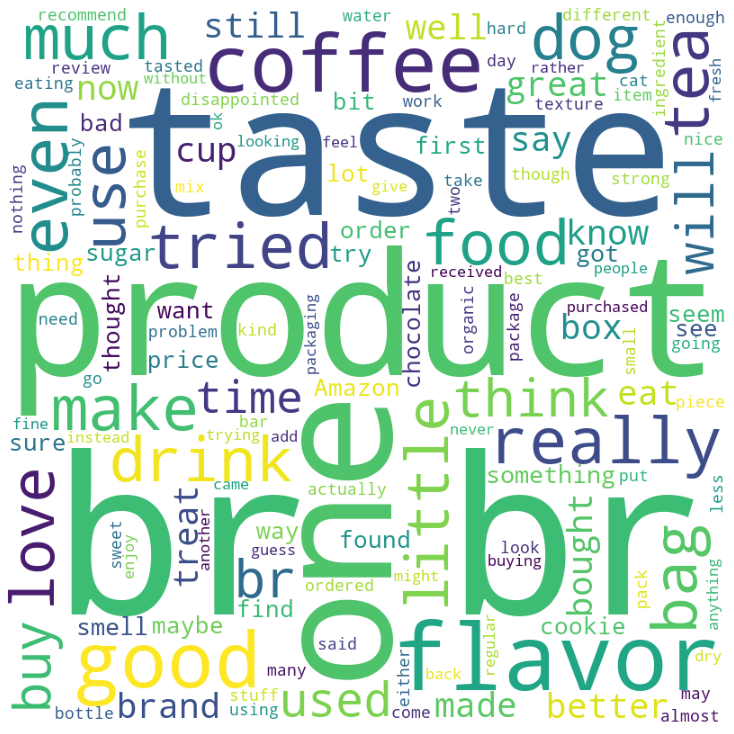

In [19]:
wc= WordCloud(width = 800, height = 800, 
                background_color ='white', 
                 
                min_font_size = 13).generate(''.join(data[data.Score==2].Text))

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()              

In [20]:
vect= TfidfVectorizer()
vect.fit_transform(data.Text)
tfidf = vect.transform(data.Text)

In [21]:
vect.get_feature_names()

['00',
 '000',
 '0003',
 '000iu',
 '000kwh',
 '000mg',
 '002',
 '005',
 '008',
 '0099',
 '00am',
 '00pm',
 '01',
 '0100',
 '01069',
 '0143114964',
 '0174',
 '02',
 '03',
 '030',
 '030712',
 '032',
 '03510',
 '0373892322',
 '03885',
 '03oz',
 '04',
 '042608460503',
 '0451155505',
 '0472066978',
 '04830',
 '04mg',
 '05',
 '05715',
 '06',
 '062',
 '0625',
 '06254',
 '0674005392',
 '07',
 '07003',
 '070590080010',
 '0738551856',
 '0743246268',
 '0777',
 '08',
 '0811845354',
 '0825305845',
 '0836194942',
 '089',
 '0892817267',
 '08oz',
 '09',
 '090',
 '0979201802',
 '0982207786',
 '0cm',
 '0g',
 '0mg',
 '0oz',
 '0r',
 '0ther',
 '0xk6hzpjrkaed855hewp',
 '0z',
 '10',
 '100',
 '1000',
 '100000',
 '1000mg',
 '1000w',
 '100cal',
 '100g',
 '100lbs',
 '100m',
 '100mcg',
 '100mg',
 '100s',
 '100th',
 '100watt',
 '100x',
 '100x3',
 '101',
 '1010',
 '102308',
 '103',
 '104',
 '105',
 '10504',
 '106',
 '108',
 '10am',
 '10c',
 '10g',
 '10gm',
 '10gr',
 '10grams',
 '10k',
 '10lb',
 '10lbs',
 '10mcg',
 

In [22]:
# checking the length of features
len(vect.get_feature_names())

34232

In [23]:
X_train,X_test,y_train,y_test= train_test_split(data.Text, data.Score,test_size=0.2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


(25915,) (6479,) (25915,) (6479,)


In [24]:
vect= TfidfVectorizer()
vect.fit_transform(X_train)
tfidf = vect.transform(X_train)

In [25]:
clf = DecisionTreeClassifier()
clf.fit(tfidf, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
! wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-10-01 05:05:52--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-10-01 05:05:52--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-10-01 05:05:52--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [27]:
 tfidf_test=vect.transform(X_test)
 pred =clf.predict(tfidf_test)
 print("The accuracy and f1 score are {}" .format(accuracy_score(y_test,pred)))

The accuracy and f1 score are 0.46812779749961414


In [28]:
# We now transform the document into a bag-of-words representation i.e matrix form. 

X_train_vectorized = vect.transform(X_train)

In [ ]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))
accuracy_score(y_test, predictions)
print("The accuracy and f1 score are {}" .format(accuracy_score(y_test,predictions)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The accuracy and f1 score are 0.6496372897052014
